In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [30]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.test.num_examples

10000

In [10]:
mnist.validation.num_examples

5000

In [14]:
single_image = mnist.train.images[1].reshape(28, 28)

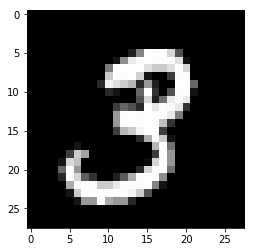

In [16]:
plt.imshow(single_image, cmap='gist_gray')

In [17]:
single_image.min()

0.0

In [18]:
single_image.max()

1.0

# Placeholders

In [20]:
x = tf.placeholder(tf.float32, shape=[None, 784])

# Variables

In [21]:
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Create graph operations

In [22]:
y = tf.matmul(x, w)+b

# Error/Loss Functions

In [23]:
y_true = tf.placeholder(tf.float32, [None, 10])

In [24]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,
                                                                      logits =y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



# Optimizer

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

# Create Session

In [26]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict = {x: batch_x, y_true: batch_y})
    #evaluate the model
    #predicted [3,4] true [3,9]
    #[true, false]
    #[1.0, 0.0]
    #0.5
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    print(correct_prediction.shape)
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(acc, feed_dict = {x:mnist.test.images, y_true: mnist.test.labels}))

(?,)
0.9183


In [34]:
a = mnist.train.next_batch(100)

TypeError: index() takes at least 1 argument (0 given)